In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
%matplotlib inline 

import os
import cv2
import warnings
import cv2 as cv
from termcolor import colored
warnings.filterwarnings('ignore')

from skimage.transform import resize

import random
from PIL import Image 
from skimage.io import imread

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.activations import softmax

from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Model

import time

print(tf.__version__)

2.4.1


In [3]:
print(colored('\x1B[1mMaking functions for followings:','green'))
print(colored('\x1B[1m1. To Identity Metadata\n2. For Loading data from drive','blue'))
class IdentityMetadata():
    def __init__(self, base, name, file):
        #print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 


def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('/content/drive/MyDrive/Files/Output/PINS')

Making functions for followings:
1. To Identity Metadata
2. For Loading data from drive


In [4]:
print(colored('\x1B[1mSome samples of metadata.','green'))
for y in range(0,len(metadata),1000):
  x=random.choice(range(len(metadata)))
  md=metadata[x]
  print('Name of Person: '+str(md).split('/')[-2].replace('pins_', ''))
  print('Path of image:\n'+str(md)+'\n')

Some samples of metadata.
Name of Person: Jeremy Renner
Path of image:
/content/drive/MyDrive/Files/Output/PINS/pins_Jeremy Renner/Jeremy Renner27.jpg

Name of Person: kristen stewart face
Path of image:
/content/drive/MyDrive/Files/Output/PINS/pins_kristen stewart face/kristen stewart face94.jpg

Name of Person: Gwyneth Paltrow
Path of image:
/content/drive/MyDrive/Files/Output/PINS/pins_Gwyneth Paltrow/Gwyneth Paltrow49.jpg

Name of Person: Brenton Thwaites
Path of image:
/content/drive/MyDrive/Files/Output/PINS/pins_Brenton Thwaites/Brenton Thwaites118.jpg

Name of Person: Gwyneth Paltrow
Path of image:
/content/drive/MyDrive/Files/Output/PINS/pins_Gwyneth Paltrow/Gwyneth Paltrow119.jpg

Name of Person: Anna Gunn
Path of image:
/content/drive/MyDrive/Files/Output/PINS/pins_Anna Gunn/Anna Gunn24_2281.jpg

Name of Person: Sophie Turner
Path of image:
/content/drive/MyDrive/Files/Output/PINS/pins_Sophie Turner/Sophie Turner51_1633.jpg

Name of Person: alycia debnam carey face
Path of i

In [5]:
for y in range(0,len(metadata),1250):
  print(y)

0
1250
2500
3750
5000
6250
7500
8750
10000


In [6]:
print(colored('\x1B[1mPloting some normal images and mask images','green'))

Ploting some normal images and mask images


Image No: 1013


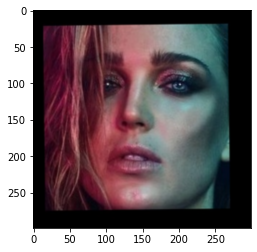

Image No: 4874


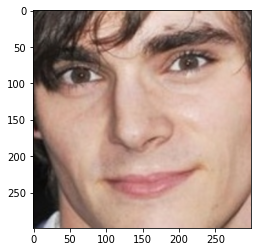

Image No: 765


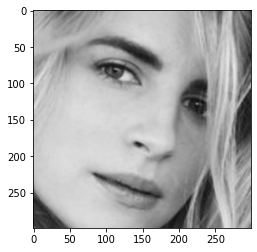

Image No: 5104


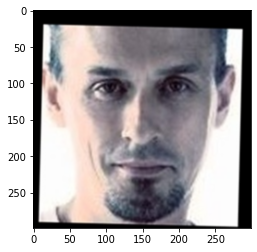

Image No: 2207


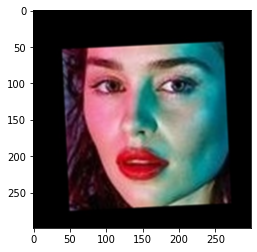

In [7]:
i=1
for y in range(0,5):
  x=random.choice(range(len(metadata)))
  
  pathimg = str(metadata[x])
  img = cv2.imread(pathimg,1)
  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
  print('Image No:',x+1)
  plt.imshow(image, cmap='gray', interpolation='bicubic')
  plt.show()

In [8]:
print(colored('\x1B[1mBuilding VGG16 model for feature extraction','green'))
def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

Building VGG16 model for feature extraction


In [9]:
print(colored('\x1B[1mLoading weights of VGG16_face_weights from drive','green'))
model = vgg_face()
WEIGHTS_FILE = '/content/drive/MyDrive/Files/Part 3 - vgg_face_weights.h5'
model.load_weights(WEIGHTS_FILE)

Loading weights of VGG16_face_weights from drive


In [10]:
print(colored('\x1B[1mFreezing top layer of model','green'))
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

Freezing top layer of model


In [11]:
print(colored('\x1B[1mMaking function for loading image','green'))
def load_image(path):
    image = cv2.imread(path, 1)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return img[...,::-1]

Making function for loading image


In [12]:
print(colored('\x1B[1mChecking VGG16 model for generating embedding vectors of 1 image','green'))
img_path = metadata[0].image_path()

print('\x1B[1m\nImage Path',img_path)
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
print('\n----------Normalising Image----------')
img = (img / 255.).astype(np.float32)

print('\n--------Resizeing Image to 224---------')
img = cv2.resize(img, dsize = (224,224))
print('\nShape of resized image: ',img.shape)

print('\n------Generating Embedding Vector------')
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print('\nType of Embedding Vector: ',type(embedding_vector))
print('\nShape of Embedding Vector: ',embedding_vector.shape)

Checking VGG16 model for generating embedding vectors of 1 image

Image Path /content/drive/MyDrive/Files/Output/PINS/pins_Aaron Paul/Aaron Paul129_259.jpg

----------Normalising Image----------

--------Resizeing Image to 224---------

Shape of resized image:  (224, 224, 3)

------Generating Embedding Vector------

Type of Embedding Vector:  <class 'numpy.ndarray'>

Shape of Embedding Vector:  (2622,)


In [13]:
print('\nShape of Embedding Vector: ',embedding_vector.shape)


Shape of Embedding Vector:  (2622,)


In [14]:
embeddings = np.zeros((metadata.shape[0], 2622))
print(colored('\x1B[1mGenerating Embedding Vectors for all image','green'))
start_time = time.time()
for i, m in enumerate(metadata):
  img_path = m.image_path()
  image = load_image(img_path)
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224, 224))
  embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
computational_time = time.time() - start_time
print('Done in %0.3fs' %(computational_time))

Generating Embedding Vectors for all image
Done in 9084.664s


In [15]:
print(colored('\x1B[1mDefining distance metrics function','green'))
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

Defining distance metrics function


Checking distance metrics for images


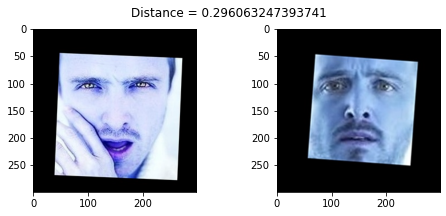

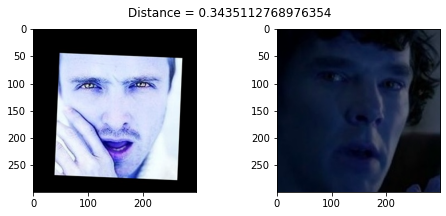

In [16]:
print(colored('\x1B[1mChecking distance metrics for images','green'))
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2])}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()))

show_pair(2, 4)
show_pair(2, 511)

In [17]:
print(colored('\x1B[1mSetting values for train and test sets','green'))
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0
print('\x1B[1m\nNo. of train set',np.sum(train_idx))
print('\x1B[1m\nNo. of test set',np.sum(test_idx))

Setting values for train and test sets

No. of train set 9573

No. of test set 1197


In [18]:
print(colored('\x1B[1mSpliting Embeddings Vectors into train and test sets','green'))
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]
print('\x1B[1m\nShape of X_train set',X_train.shape)
print('\x1B[1m\nShape of X_test set',X_test.shape)

Spliting Embeddings Vectors into train and test sets

Shape of X_train set (9573, 2622)

Shape of X_test set (1197, 2622)


In [19]:
print(colored('\x1B[1mEncoding the target set according to labesl','green'))
targets = np.array([m.name for m in metadata])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(targets) 

print(colored('\x1B[1mSpliting target set into train and test sets','green'))
y_train = y[train_idx]
y_test  = y[test_idx]

print('\x1B[1m\nShape of y_train set',y_train.shape)
print('\x1B[1m\nShape of y_test set',y_test.shape)

Encoding the target set according to labesl
Spliting target set into train and test sets

Shape of y_train set (9573,)

Shape of y_test set (1197,)


In [20]:
print(colored('\x1B[1mChecking total count of labels in target and split sets','green'))
print('\x1B[1m\nTotal count of labels in target sets',len(np.unique(targets)))
print('\x1B[1m\nTotal count of labels in train sets',len(np.unique(y_train)))
print('\x1B[1m\nTotal count of labels in test sets',len(np.unique(y_test)))

Checking total count of labels in target and split sets

Total count of labels in target sets 100

Total count of labels in train sets 100

Total count of labels in test sets 100


In [21]:
print(colored('\x1B[1mStandarizing the X sets','green'))
scaler = StandardScaler()
print('\n----------Standarizing X_train----------')
X_train_scaled = scaler.fit_transform(X_train)
print('\n-----------Standarizing X_test-----------')
X_test_scaled = scaler.fit_transform(X_test)

Standarizing the X sets

----------Standarizing X_train----------

-----------Standarizing X_test-----------


In [22]:
print(colored('\x1B[1m------covMatrix------','green'))
covMatrix = np.cov(X_train_scaled,rowvar=False)

------covMatrix------


In [23]:
eig_vals, eig_vecs = np.linalg.eig(covMatrix)
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [24]:
print(colored('\x1B[1mFitting sets in PCA','green'))
features = 2622
# Taking the attribute count 2622 except the target column.
pca = PCA(n_components=features)
pca.fit(X_train)

Fitting sets in PCA


PCA(copy=True, iterated_power='auto', n_components=2622, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
print("Eigen Values :")
print("====================")
print(pca.explained_variance_)

Eigen Values :
[4.64433654e-02 1.43968352e-02 1.22014919e-02 ... 2.11353932e-11
 2.10103426e-11 2.04649280e-11]


In [26]:
print("Eigen Vectors :")
print("====================")
print(pca.components_)

Eigen Vectors :
[[-2.04104102e-02  8.50351288e-03 -3.00152915e-03 ... -7.26615329e-03
   1.97233550e-02  4.40590208e-02]
 [ 1.41476762e-02 -7.64700901e-03  2.60096887e-03 ... -2.13409172e-02
  -1.27956804e-02  9.60175849e-03]
 [ 1.38496941e-03 -9.31406250e-03 -2.84685781e-02 ...  4.35111231e-03
  -1.92098519e-02 -3.60296316e-02]
 ...
 [ 7.43422114e-05  1.30556845e-04 -3.48694545e-05 ... -1.42997171e-04
   2.92062940e-04 -3.27857684e-05]
 [-3.57272988e-03 -3.79825948e-03 -3.95151276e-03 ... -3.43350078e-03
  -3.67295761e-03 -3.53950190e-03]
 [-9.07371380e-04 -6.60020528e-04 -1.03942455e-03 ... -7.15047919e-04
  -9.98734950e-04 -8.98930849e-04]]


In [27]:
print("The percentage of variation explained by each eigen Vector : ")
print("============================================================")
print(pca.explained_variance_ratio_)

The percentage of variation explained by each eigen Vector : 
[1.50147927e-01 4.65438913e-02 3.94465108e-02 ... 6.83291452e-11
 6.79248663e-11 6.61615817e-11]


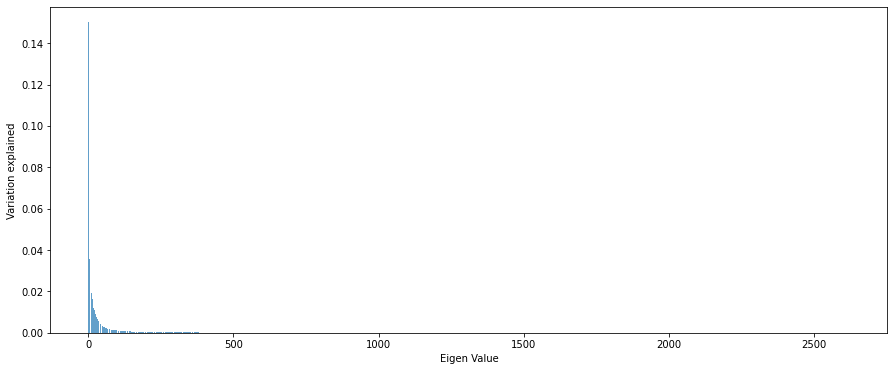

In [28]:
fig1 = plt.figure(figsize=(15,6))
plt.bar(list(range(1,(features+1))),pca.explained_variance_ratio_,alpha=0.7)
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

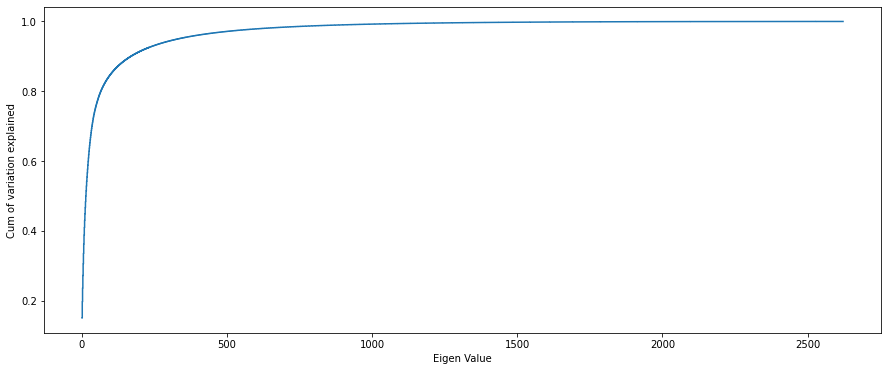

In [29]:
fig1 = plt.figure(figsize=(15,6))
plt.step(list(range(1,(features+1))),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.show()

In [30]:
# Set variable for the decided dimension
final_n_component = 100
# Taking the attribute count as per the decision.
pca_component = PCA(n_components=final_n_component, svd_solver='full')
pca_component.fit(X_train_scaled)
print(f"Eigen Values (with {final_n_component} PCA components):")
print("===========================================")
print(pca_component.explained_variance_)
print(f"Eigen Vectors (with {final_n_component} PCA components):")
print("=================================================")
print(pca_component.components_)
print(f"The percentage of variation explained by each eigen Vector (with {final_n_component} PCA components):")
print("==========================================================================================")
print(pca_component.explained_variance_ratio_)
# Transforming the dataset
pca_X_train = pca_component.transform(X_train_scaled)
pca_X_test = pca_component.transform(X_test_scaled)
pca_X_train

Eigen Values (with 100 PCA components):
[356.35162022 141.4424545  104.00653705  96.80982402  88.74696227
  82.65006431  66.94376521  61.62145151  54.99192681  50.80510233
  47.37967665  45.00067966  43.38299645  41.03436149  37.4425475
  36.1229962   34.398345    31.84581157  30.32648156  29.76236612
  28.67528297  27.78669017  25.31605514  24.48278425  24.06924546
  23.13142242  21.89143658  19.92952309  19.8694621   19.20275971
  18.22406535  17.28313319  16.55731938  16.31466292  14.86813956
  14.13231122  13.79324169  13.56120445  13.22556987  12.81277272
  11.73175055  11.2005806   10.38863486  10.24287773   9.68180082
   9.35857283   8.98662349   8.80159367   8.58537293   8.39476437
   8.24031498   8.02440917   7.59715143   7.36792562   7.27739762
   7.13270505   7.01167453   6.82546009   6.62837947   6.54394275
   6.20954346   6.01859194   5.92003183   5.70820187   5.58879376
   5.38341092   5.25603191   5.0905273    4.98798327   4.82184176
   4.79735783   4.69257287   4.630731

array([[-18.01438923,   6.01042325,  -4.01965676, ...,  -1.73028761,
         -1.02342942,   3.08776729],
       [ -6.46472856,  17.15862086,  -9.33883759, ...,   0.79019613,
         -2.13333901,  -0.04040681],
       [-19.7406021 ,  11.68973995, -10.68857585, ...,   1.93955544,
         -2.65685103,   2.85435975],
       ...,
       [ 35.00840515, -11.69698818, -12.12811436, ...,  -0.83416994,
         -0.1139336 ,  -1.1228672 ],
       [ 11.83010711, -22.68301521,  -3.75490557, ...,   4.21412795,
          0.35530033,  -0.1598217 ],
       [ 20.37619295, -18.09853308, -14.8971349 , ...,   5.53348001,
          0.59657654,   0.22210605]])

In [31]:
print(colored('\x1B[1mFitting reduced data in SVM','green'))
pca_svm = SVC(C = 1, kernel = 'linear', degree=3, gamma= "scale")
print('\x1B[1mScore of train data',pca_svm.fit(pca_X_train, y_train))

Fitting reduced data in SVM
Score of train data SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [32]:
print('\x1B[1mScore of test data',pca_svm.score(pca_X_test, y_test))

Score of test data 0.9624060150375939


Text(0.5, 1.0, 'Identified as Dwayne Johnson')

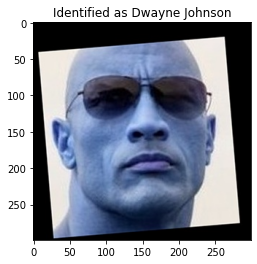

In [33]:
example_idx = 222

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = pca_svm.predict([pca_X_test[example_idx]])
#### Add your code here ####
example_identity = label_encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
name = example_identity.split('_')
person_name = name[1].split(' ')
person_name = person_name[0].capitalize() + ' ' + person_name[1].capitalize()
plt.title(f'Identified as {person_name}')

In [34]:
print(f"The above prediction is correct as it has identified the person name {person_name} with the given image")

The above prediction is correct as it has identified the person name Dwayne Johnson with the given image


Text(0.5, 1.0, 'Identified as Neil Patrick')

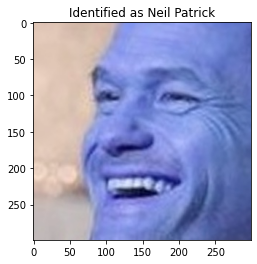

In [35]:
example_idx = 500

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = pca_svm.predict([pca_X_test[example_idx]])
#### Add your code here ####
example_identity = label_encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
name = example_identity.split('_')
person_name = name[1].split(' ')
person_name = person_name[0].capitalize() + ' ' + person_name[1].capitalize()
plt.title(f'Identified as {person_name}')

In [36]:
print(f"The above prediction is correct as it has identified the person name {person_name} with the given image")

The above prediction is correct as it has identified the person name Neil Patrick with the given image


Typical measures such as Euclidean distance and Cosine distance are calculated between two embeddings and faces are said to match or verify if the distance is below a predefined threshold, often tuned for a specific dataset or application.